In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("C:\Python\Python385\Lib\site-packages\imdb_ds.csv")
data=data.rename(columns={'review':'text'})
data=data[:5000]
data

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [10]:
import re
import string
def processor(text):
    text=text.lower()
    tokens=re.split('\W+',text)
    text=" ".join(i for i in tokens)
    return text
data['text']=data['text'].apply(processor)
data

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive
...,...,...
4995,an interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,once again jet li brings his charismatic prese...,positive
4998,i rented this movie after hearing chris gore s...,negative


In [11]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import string
from string import punctuation

In [13]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [14]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer

In [15]:
def get_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
from nltk import pos_tag
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
def lemmatize_words(review):
    final_review = []
    for i in review.split():
        if i.strip().lower() not in stop and i.isnumeric()==False and len(i)!=1:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_pos(pos[0][1]))
            final_review.append(word.lower())
    return " ".join(final_review)

In [19]:
data['text'] = data.text.apply(lemmatize_words)
data

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'C:\\Python\\Python385\\nltk_data'
    - 'C:\\Python\\Python385\\share\\nltk_data'
    - 'C:\\Python\\Python385\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [12]:
#by vader(valence aware dictionary for sentiment reasoning) sentiment intensity analyzer

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def senti(dt):
    return sia.polarity_scores(dt)
data['polarity_scores']=data['text'].apply(senti)

def analy1(dic):
    if dic['compound']<0:
        return 'Negative'
    elif dic['compound']>=0:
        return 'Positive'
data['sentiment2']=data['polarity_scores'].apply(analy1)
data

,text,sentiment,polarity_scores,sentiment2
0,one of the other reviewers has mentioned that ...,positive,"{'neg': 0.197, 'neu': 0.747, 'pos': 0.056, 'co...",Negative
1,a wonderful little production br br the filmin...,positive,"{'neg': 0.052, 'neu': 0.768, 'pos': 0.18, 'com...",Positive
2,i thought this was a wonderful way to spend ti...,positive,"{'neg': 0.103, 'neu': 0.657, 'pos': 0.239, 'co...",Positive
3,basically there s a family where a little boy ...,negative,"{'neg': 0.13, 'neu': 0.791, 'pos': 0.079, 'com...",Negative
4,petter mattei s love in the time of money is a...,positive,"{'neg': 0.051, 'neu': 0.792, 'pos': 0.157, 'co...",Positive
...,...,...,...,...
4995,an interesting slasher film with multiple susp...,negative,"{'neg': 0.109, 'neu': 0.819, 'pos': 0.072, 'co...",Negative
4996,i watched this series when it first came out i...,positive,"{'neg': 0.063, 'neu': 0.829, 'pos': 0.108, 'co...",Positive
4997,once again jet li brings his charismatic prese...,positive,"{'neg': 0.059, 'neu': 0.738, 'pos': 0.204, 'co...",Positive
4998,i rented this movie after hearing chris gore s...,negative,"{'neg': 0.126, 'neu': 0.722, 'pos': 0.152, 'co...",Positive


<AxesSubplot:title={'center':'sentiment_analysis of data by vader'}>

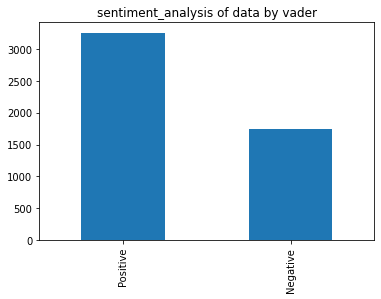

In [22]:
data.sentiment2.value_counts().plot(kind='bar',title='sentiment_analysis of data by vader')

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(data.text,data.sentiment2,test_size=0.1,random_state=0)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(stop_words=stop)
x_train = cv.fit_transform(x_train)
x_test= cv.transform(x_test)

In [20]:
#LOGISTIC REGRESSION

In [28]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Python\Python385\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred_lr=lr.predict(x_test)
lr.score(x_train,y_train)

0.9997777777777778

In [30]:
cm=confusion_matrix(y_test,y_pred_lr)
cm

array([[138,  53],
       [ 39, 270]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

    Negative       0.78      0.72      0.75       191
    Positive       0.84      0.87      0.85       309

    accuracy                           0.82       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.81      0.82      0.81       500



In [33]:
lr_a=accuracy_score(y_test,y_pred_lr)
print(lr_a)

0.816


In [26]:
#NAIVEBAYES MULTINOMIALNB

In [34]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)

In [35]:
mnb.score(x_train,y_train)

0.956

In [36]:
cm=confusion_matrix(y_test,y_pred_mnb)
cm

array([[124,  67],
       [ 39, 270]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

    Negative       0.76      0.65      0.70       191
    Positive       0.80      0.87      0.84       309

    accuracy                           0.79       500
   macro avg       0.78      0.76      0.77       500
weighted avg       0.79      0.79      0.78       500



In [38]:
mnb_a=accuracy_score(y_test,y_pred_mnb)
print(mnb_a)

0.788


In [32]:
#SVM

In [39]:
ls=SVC()

In [40]:
ls.fit(x_train,y_train)
y_pred_ls=ls.predict(x_test)
ls.score(x_train,y_train)

0.9382222222222222

In [41]:
print(confusion_matrix(y_test,y_pred_ls))

[[ 92  99]
 [ 10 299]]


In [42]:
ls_a=accuracy_score(y_test,y_pred_ls)
print(ls_a)

0.782


In [43]:
print(classification_report(y_test,y_pred_ls))

              precision    recall  f1-score   support

    Negative       0.90      0.48      0.63       191
    Positive       0.75      0.97      0.85       309

    accuracy                           0.78       500
   macro avg       0.83      0.72      0.74       500
weighted avg       0.81      0.78      0.76       500



In [44]:
from sklearn.ensemble import VotingClassifier
lr1 = LogisticRegression( random_state=0)
mnb1 = MultinomialNB()
ls1 =  SVC()
model = VotingClassifier(estimators=[('lr', lr1), ('mnb', mnb1), ('ls', ls1)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Python\Python385\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.822

In [39]:
# by nlp technique

In [45]:
text="Hello! a very Good evening everyone"
p=senti(text)
print(analy1(p))

Positive


In [46]:
text1="i am not at all happy"
print(analy1(senti(text1)))

Negative


In [47]:
review="The product is brilliant. I absolutely loved it and I would recommend it to everyone"
print(analy1(senti(review)))

Positive


In [48]:
review1="It is horrible. Please don’t buy this. It is a waste of money"
print(analy1(senti(review1)))

Negative


<AxesSubplot:title={'center':'sentiment analysis'}>

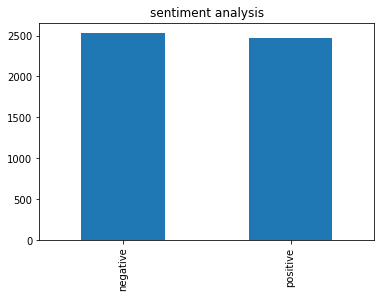

In [49]:
data.sentiment.value_counts().plot(kind='bar',title='sentiment analysis')

In [50]:
data.sentiment2.value_counts()

Positive    3257
Negative    1743
Name: sentiment2, dtype: int64

In [51]:
print(analy1(senti("the best")))

Positive


In [52]:
output = pd.DataFrame({"Model":['MultinomialNB','Logistic Regression','SVC'],
                      "Accuracy":[mnb_a,lr_a,ls_a]})
output

,Model,Accuracy
0,MultinomialNB,0.788
1,Logistic Regression,0.816
2,SVC,0.782


In [48]:
#by machine learning model

In [53]:
i=["she is a very good girl","he is very brilliant","honesty is best policy","she is  the  criminal","she is a bad girl"]

In [54]:
i=cv.transform(i)
print(lr.predict(i))

['Positive' 'Positive' 'Positive' 'Positive' 'Negative']


In [55]:
import speech_recognition as sr

In [56]:
rec=sr.Recognizer()

In [69]:
with sr.Microphone() as source:
    audio=rec.listen(source)
    input=[rec.recognize_sphinx(audio)]
    print(input)

['he says that end']


In [70]:
input=cv.transform(input)
print(lr.predict(input))

['Negative']
